In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'mrtncthrn'
os.environ['KAGGLE_KEY'] = '573ddd2f80fd6bfbb5e10cd1e74b88cc'

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:17<00:00, 57.7MB/s]
100% 1.15G/1.15G [00:17<00:00, 69.4MB/s]


In [4]:

!unzip chest-xray-pneumonia.zip
!unzip chest_xray.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray.zip          
Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/

In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:

training_dir = './chest_xray/train'
validation_dir = './chest_xray/test'
test_dir = './chest_xray/val'

In [0]:
train_path = 'chest_xray/train'
valid_path = 'chest_xray/val'
test_path = 'chest_xray/test'

In [8]:
print(len(train_path))
print(len(valid_path))
print(len(test_path))

16
14
15


In [9]:

# ImageDataGenerator() >> a keras object, generates batches of tensor image data
# flow_from_directory >> take the path to the directory and generalize batched of normalized data

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(299, 299), classes=['NORMAL', 'PNEUMONIA'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(299, 299), classes=['NORMAL', 'PNEUMONIA'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(299, 299), classes=['NORMAL', 'PNEUMONIA'], batch_size=16)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


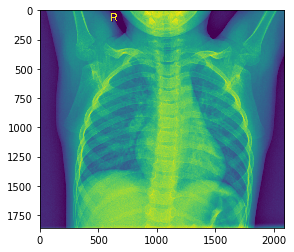

In [10]:
img = mpimg.imread(training_dir + '/NORMAL/IM-0115-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
def plot_images(path, labeled=False, max_images=6):
  amount = 0
  fig = plt.figure(figsize=(12, 6))

  for file in os.listdir(path):
    if file.endswith('.jpeg'):
      if amount == max_images:
        break

      img = mpimg.imread(os.path.join(path, file))
      plt.subplot(231+amount)
      if labeled:
        plt.title(file.split('_')[1])
      imgplot = plt.imshow(img)

      amount += 1

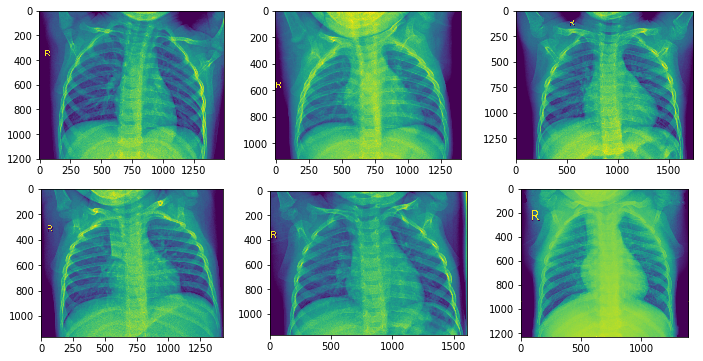

In [12]:

plot_images(training_dir + '/NORMAL')

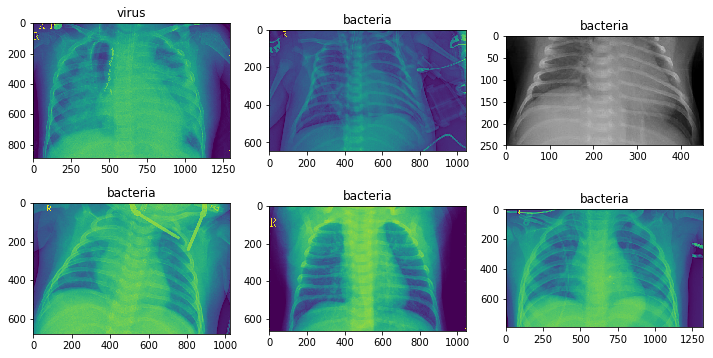

In [13]:
plot_images(training_dir + '/PNEUMONIA', labeled=True)

In [0]:
from keras.applications.inception_v3 import InceptionV3

In [0]:
def get_model():
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.BatchNormalization()(x)
  predictions = keras.layers.Dense(2, activation='softmax')(x)
  model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False
  
  model.summary()
  return model

In [16]:
model = get_model()









87916544/87910968 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
___________________

In [17]:
model.compile(keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
 - 43s - loss: 0.6712 - acc: 0.7422 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 36s - loss: 1.0568 - acc: 0.7734 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 35s - loss: 0.4387 - acc: 0.8125 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 36s - loss: 0.4482 - acc: 0.8984 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 36s - loss: 0.6319 - acc: 0.8281 - val_loss: 8.0590 - val_acc: 0.5000


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
test_imgs, test_labels = next(test_batches)

In [21]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[9 0]
 [7 0]]


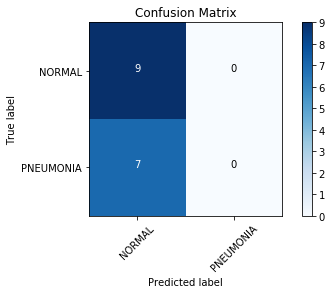

In [24]:
cm_plot_labels = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [0]:
model.save('pheumonia_model.h5')

In [0]:
new_model = keras.models.load_model('pheumonia_model.h5')